<a href="https://colab.research.google.com/github/Medii24/Reto-1-Espadas/blob/main/Naive_bayes_example_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Naive Bayes Example

In [ ]:
# Importing necessary libraries for data manipulation, model training, and evaluation.
# pandas and numpy for handling data, scikit-learn for machine learning algorithms, and matplotlib/seaborn for visualization.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the data thar we are going to use to run the bayes example
# we have ham or spam ham is a normal email
spam_df = pd.read_csv("spam.csv")

In [ ]:
spam_df.head(8)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...


In [ ]:
#Group the data by the "Category" column (ham or spam) and check the distribution of each category
# This helps us understand if the dataset has a good balance between spam and ham emails
spam_df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
#create a new "spam" column where 1 indicates spam and 0 indicates ham.
# This transformation is necessary to work with the Naive Bayes classifier which expects numeric labels.

spam_df["spam"] = spam_df["Category"].apply(lambda x: 1 if x == "spam" else 0)



In [ ]:
spam_df # we check if the new variable worked

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
#Split the data into training and testing sets (75% for training and 25% for testing)
# The messages will be used as input features, and the labels (spam or ham) will be used as the target variable

x_train, x_test, y_train, y_test = train_test_split(spam_df["Message"], spam_df["spam"], test_size=0.25)

In [ ]:
#now we want to count, we want to find the word count to store data as a matrix

cv = CountVectorizer(binary=True)
x_train_count = cv.fit_transform(x_train.values)


In [ ]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# Train the Bernoulli Naive Bayes model using the training data
# This involves fitting the model on the feature matrix (word counts) and the corresponding labels (spam/ham)

model = BernoulliNB()
model.fit(x_train_count,y_train) #train the x against the y


BernoulliNB()

In [ ]:
# Test the model with a sample "ham" email and a sample "spam" email.
# Use the trained model to predict whether each email is spam or ham and check the predictions.

good_email = ["hey can we meet and take drink tea?"]
email_good_count = cv.transform(good_email)
model.predict(email_good_count)


array([0], dtype=int64)

In [ ]:
bad_email = ["Free pizza and money reward if you access the following link, click now"]
email_bad_count = cv.transform(bad_email)
model.predict(email_bad_count)

array([0], dtype=int64)

In [ ]:
# Calculate the accuracy of the trained model by evaluating it on the test set
# The score method returns the percentage of correct predictions on the test set


X_test_count = cv.transform(x_test)
model.score(X_test_count, y_test)

0.9791816223977028

In [ ]:

y_pred = model.predict(X_test_count)

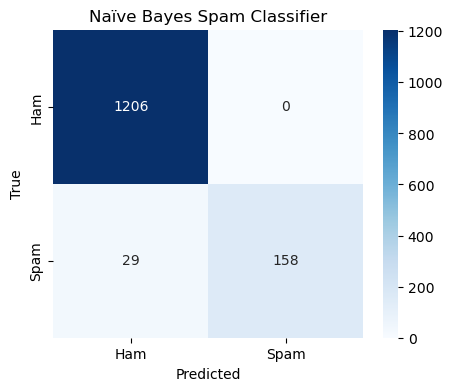

In [ ]:
#Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Ham", "Spam"],
    yticklabels=["Ham", "Spam"]
)
plt.title("Naïve Bayes Spam Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
#most important spam words
#extract the top 15 words most associated with spam emails by comparing the log probabilities.
#this identifies the words that most strongly indicate a message is spam.
feature_names = np.array(cv.get_feature_names_out())
spam_log_probs = model.feature_log_prob_[1]
ham_log_probs = model.feature_log_prob_[0]

top_spam_words = feature_names[np.argsort(spam_log_probs - ham_log_probs)[-15:]]

print("top 15 words most associated with SPAM emails:")
for word in reversed(top_spam_words):
    print(f" - {word}")


top 15 words most associated with SPAM emails:
 - claim
 - prize
 - 150p
 - guaranteed
 - 16
 - 18
 - 500
 - cs
 - tone
 - 1000
 - 100
 - awarded
 - uk
 - 150ppm
 - www


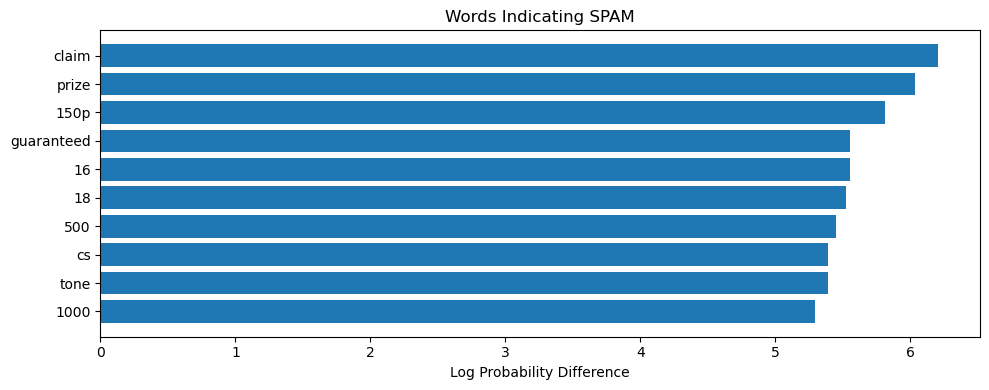

In [ ]:
#create a bar chart of the top words indicating spam.
#the bar chart shows the log probability difference between spam and ham for each word.
top_values = np.argsort(spam_log_probs - ham_log_probs)[-10:]

plt.figure(figsize=(10, 4))
plt.barh(feature_names[top_values], spam_log_probs[top_values] - ham_log_probs[top_values])
plt.title("Words Indicating SPAM")
plt.xlabel("Log Probability Difference")
plt.tight_layout()
plt.show()





In [ ]:
#experiment with different configurations of the Bernoulli Naive Bayes model by adjusting hyperparameters like alpha and class priors.
# compare the performance of each configuration based on accuracy on the test set.
configs = [
    {"name": "default", "params": {}},
    {"name": "lower_alpha", "params": {"alpha": 0.5}},
    {"name": "no_priors", "params": {"fit_prior": False}},
    {"name": "manual_priors", "params": {"fit_prior": False, "class_prior": [0.6, 0.4]}},
]

results = []
for cfg in configs:
    clf = BernoulliNB(**cfg["params"])
    clf.fit(x_train_count, y_train)
    acc = clf.score(X_test_count, y_test)
    results.append((cfg["name"], cfg["params"], acc))

pd.DataFrame(results, columns=["config", "params", "accuracy"])


,config,params,accuracy
0,default,{},0.979182
1,lower_alpha,{'alpha': 0.5},0.982771
2,no_priors,{'fit_prior': False},0.980617
3,manual_priors,"{'fit_prior': False, 'class_prior': [0.6, 0.4]}",0.979182


In [ ]:
#Compare the performance of the Bernoulli Naive Bayes model with the Multinomial Naive Bayes model.
# Both models are trained on the same training data and evaluated on the same test data.

from sklearn.naive_bayes import MultinomialNB

cv_multi = CountVectorizer()
X_train_multi = cv_multi.fit_transform(x_train)
X_test_multi = cv_multi.transform(x_test)

multi_clf = MultinomialNB()
multi_clf.fit(X_train_multi, y_train)

multi_acc = multi_clf.score(X_test_multi, y_test)
print(f"MultinomialNB accuracy: {multi_acc:.4f}")

# Compare to BernoulliNB on the same split
bern_acc = model.score(X_test_count, y_test)
print(f"BernoulliNB accuracy:   {bern_acc:.4f}")


MultinomialNB accuracy: 0.9856
BernoulliNB accuracy:   0.9792


In [ ]:
#demonstrate the use of the Multinomial Naive Bayes model with a toy dataset.
#train the model on a small sample of data and test it with some new test inputs
from sklearn.naive_bayes import MultinomialNB

toy = pd.DataFrame({
    "text": [
        "free free offer now",         # repeated "free"
        "limited limited offer free",  # repeated "limited"
        "meeting schedule tomorrow",
        "project update please review",
        "win win money now",           # repeated "win"
        "team lunch tomorrow"
    ],
    "label": ["spam", "spam", "ham", "ham", "spam", "ham"]
})

cv_toy = CountVectorizer()  # counts, not binary
X_toy = cv_toy.fit_transform(toy["text"])
y_toy = toy["label"]

clf_toy = MultinomialNB()
clf_toy.fit(X_toy, y_toy)

test_texts = ["free free money offer", "project meeting meeting now"]
preds = clf_toy.predict(cv_toy.transform(test_texts))

print("Vocabulary:", cv_toy.get_feature_names_out())
print("Predictions:", list(zip(test_texts, preds)))


Vocabulary: ['free' 'limited' 'lunch' 'meeting' 'money' 'now' 'offer' 'please'
 'project' 'review' 'schedule' 'team' 'tomorrow' 'update' 'win']
Predictions: [('free free money offer', 'spam'), ('project meeting meeting now', 'ham')]
